<a href="https://colab.research.google.com/github/deshansh27/Machine-learning/blob/main/start_up_random-forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [370]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [371]:
!kaggle datasets download -d manishkc06/startup-success-prediction

startup-success-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [372]:
!unzip startup-success-prediction.zip

Archive:  startup-success-prediction.zip
replace startup data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: startup data.csv        


In [373]:
import pandas as pd
dataset=pd.read_csv('/content/startup data.csv')
dataset.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [374]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [375]:
dataset['status'].value_counts()

acquired    597
closed      326
Name: status, dtype: int64

In [376]:
dataset.isna().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [377]:
dataset.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,...,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,...,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [378]:
dataset.corr()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
Unnamed: 0,1.000000,0.054726,0.023292,-0.068721,-0.004507,-0.116533,-0.135614,-0.131698,-0.079950,-0.118456,...,-0.040929,0.006243,-0.040057,0.134044,-0.076568,-0.135289,-0.090922,-0.081123,0.026713,0.026019
latitude,0.054726,1.000000,0.368475,0.046560,-0.046868,-0.041692,-0.072000,-0.054275,-0.039198,-0.000659,...,-0.033905,-0.039656,0.031045,0.028891,-0.033072,-0.011801,-0.057762,-0.018825,-0.018176,0.032675
longitude,0.023292,0.368475,1.000000,-0.036092,-0.014158,-0.000148,-0.051674,-0.087701,-0.073197,0.022447,...,0.021244,-0.046560,0.024852,0.102001,-0.066288,-0.067017,-0.042309,-0.042854,-0.045191,-0.091913
labels,-0.068721,0.046560,-0.036092,1.000000,-0.075637,0.073731,0.162279,0.265871,0.360434,0.206049,...,0.002373,-0.042408,-0.056515,-0.072840,0.184307,0.208257,0.165902,0.139940,0.185992,0.310652
age_first_funding_year,-0.004507,-0.046868,-0.014158,-0.075637,1.000000,0.762382,0.593526,0.472029,-0.187817,-0.155478,...,-0.012596,0.115649,0.168140,-0.345985,-0.293081,-0.060532,0.033388,0.121338,0.114363,0.050638
age_last_funding_year,-0.116533,-0.041692,-0.000148,0.073731,0.762382,1.000000,0.687515,0.632099,0.073080,0.385999,...,0.029712,0.091918,0.351044,-0.354470,-0.099762,0.258928,0.317469,0.312340,0.122893,0.200727
age_first_milestone_year,-0.135614,-0.072000,-0.051674,0.162279,0.593526,0.687515,1.000000,0.777484,0.245364,0.195207,...,0.063367,0.031647,0.109566,-0.278960,0.014977,0.190824,0.209076,0.253121,0.055704,0.155329
age_last_milestone_year,-0.131698,-0.054275,-0.087701,0.265871,0.472029,0.632099,0.777484,1.000000,0.348534,0.262056,...,0.047602,-0.001843,0.089589,-0.249427,0.113306,0.261767,0.278814,0.252636,0.083480,0.206859
relationships,-0.079950,-0.039198,-0.073197,0.360434,-0.187817,0.073080,0.245364,0.348534,1.000000,0.358883,...,0.078289,-0.073963,-0.028938,-0.060625,0.317130,0.285015,0.259842,0.207488,0.115061,0.222207
funding_rounds,-0.118456,-0.000659,0.022447,0.206049,-0.155478,0.385999,0.195207,0.262056,0.358883,1.000000,...,0.028304,-0.012769,0.334832,0.010606,0.260598,0.444454,0.440923,0.323620,0.043044,0.259345


**pre-processing**

In [379]:
from sklearn import preprocessing

In [380]:
lb_enc=preprocessing.LabelEncoder()
dataset['status'].unique()


array(['acquired', 'closed'], dtype=object)

In [381]:
dataset['status']=lb_enc.fit_transform(dataset['status'])
dataset['status'].unique()

array([0, 1])

In [382]:
dataset['category_code'].unique()

array(['music', 'enterprise', 'web', 'software', 'games_video',
       'network_hosting', 'finance', 'mobile', 'education',
       'public_relations', 'security', 'other', 'photo_video', 'hardware',
       'ecommerce', 'advertising', 'travel', 'fashion', 'analytics',
       'consulting', 'biotech', 'cleantech', 'search', 'semiconductor',
       'social', 'medical', 'automotive', 'messaging', 'manufacturing',
       'hospitality', 'news', 'transportation', 'sports', 'real_estate',
       'health'], dtype=object)

In [383]:
dataset['category_code']=lb_enc.fit_transform(dataset['category_code'])
dataset['category_code'].unique()

array([19,  8, 34, 30, 11, 20, 10, 18,  7, 24, 27, 22, 23, 12,  6,  0, 33,
        9,  1,  5,  3,  4, 26, 28, 29, 16,  2, 17, 15, 14, 21, 32, 31, 25,
       13])

In [384]:
dataset['state_code'].unique()

array(['CA', 'MA', 'KY', 'NY', 'CO', 'VA', 'TX', 'WA', 'IL', 'NC', 'PA',
       'GA', 'NH', 'MO', 'FL', 'NJ', 'WV', 'MI', 'DC', 'CT', 'MD', 'OH',
       'TN', 'MN', 'RI', 'OR', 'UT', 'ME', 'NV', 'NM', 'IN', 'AZ', 'ID',
       'AR', 'WI'], dtype=object)

In [385]:
dataset['state_code']=lb_enc.fit_transform(dataset['state_code'])
dataset['state_code'].unique()

array([ 2, 12, 11, 23,  3, 31, 29, 32,  9, 18, 26,  7, 19, 17,  6, 20, 34,
       15,  5,  4, 13, 24, 28, 16, 27, 25, 30, 14, 22, 21, 10,  1,  8,  0,
       33])

In [386]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    int64  
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

**check for na values**

In [387]:
dataset.isna().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [388]:
#filling the empy cells of this prtrticular column using the median of the columns
dataset['age_first_milestone_year']=dataset['age_first_milestone_year'].fillna(dataset['age_first_milestone_year'].median())

In [395]:
dataset.isna().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year      0
age_last_milestone_year       0
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [396]:
# same reason as above for filling empty cells
dataset['age_last_milestone_year']=dataset['age_last_milestone_year'].fillna(dataset['age_last_milestone_year'].median())

In [397]:
dataset.isna().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year      0
age_last_milestone_year       0
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa62f7a8130>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa62f7a87f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa62f815d90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa62f7a8eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa62f7ae1f0>],
 'means': []}

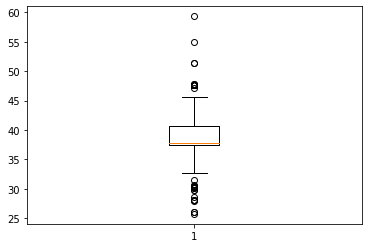

In [398]:
import matplotlib.pyplot as plt
plt.boxplot(dataset['latitude'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa62f77b3a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa62f77ba60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa62f77b040>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa62f784160>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa62f784460>],
 'means': []}

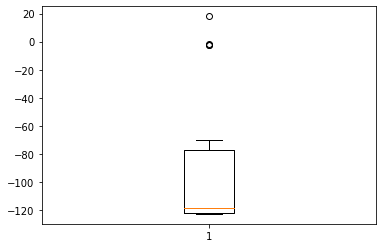

In [399]:
plt.boxplot(dataset['longitude'])

In [400]:
dataset.describe()

,Unnamed: 0,state_code,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,10.319610,38.517442,-103.539212,0.646804,2.235630,3.931456,2.967273,4.708687,7.710726,...,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317,0.353196
std,333.585431,10.705925,3.741497,22.394167,0.478222,2.510449,2.967910,2.727845,2.937226,7.265776,...,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052,0.478222
min,1.000000,0.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,283.500000,2.000000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.252100,2.930150,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,0.000000
50%,577.000000,2.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000,0.000000
75%,866.500000,23.000000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.002700,6.039750,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000,1.000000
max,1153.000000,34.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7fa62f75a940>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa62f6e3040>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa62f75a5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa62f6e3700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa62f6e3a00>],
 'means': []}

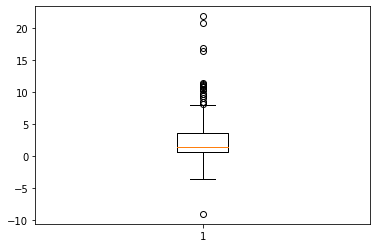

In [401]:
plt.boxplot(dataset['age_first_funding_year'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa62f6ae820>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa62f6aeee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa62f6ae4c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa62f6ba5e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa62f6ba8e0>],
 'means': []}

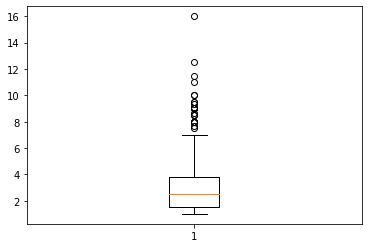

In [402]:
plt.boxplot(dataset['avg_participants'])

** from the above table we see that there is max difference between 3rd quartile and max in column-latitude,age_first_funding_year,last_funding_year,age_first_milestone_year,age_last_milestone_year	,relationships,avg_participants**

** handling outliers using caping**

In [403]:
dataset=dataset.drop(['latitude','longitude','Unnamed: 0','id','Unnamed: 6','name','founded_at','closed_at','first_funding_at','last_funding_at','object_id','zip_code','city'],axis=1)


In [404]:
dataset.head()

,state_code,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,2,1,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,...,1,0,1,0,0,0,0,1.0000,0,0
1,2,1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,...,0,1,0,0,1,1,1,4.7500,1,0
2,2,1,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,...,0,0,0,1,0,0,0,4.0000,1,0
3,2,1,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,...,0,0,0,0,1,1,1,3.3333,1,0
4,2,0,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,...,0,1,1,0,0,0,0,1.0000,1,1


In [405]:
#creating copy of dataset so the actual data dont get disturbed
dataset_cap=dataset.copy()

In [406]:
dataset_cap.head()

,state_code,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,2,1,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,...,1,0,1,0,0,0,0,1.0000,0,0
1,2,1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,...,0,1,0,0,1,1,1,4.7500,1,0
2,2,1,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,...,0,0,0,1,0,0,0,4.0000,1,0
3,2,1,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,...,0,0,0,0,1,1,1,3.3333,1,0
4,2,0,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,...,0,1,1,0,0,0,0,1.0000,1,1


In [411]:
# keep changing the value of quantitle ie 0.25 and 0.75 , randomly do hit and try method and check using bxplot is outliers removed or not
import numpy as np
q1=dataset_cap['age_first_funding_year'].quantile(0.5)
q3=dataset_cap['age_first_funding_year'].quantile(0.6)
iqr=q3-q1
upper_whisker=q3+(1.5*iqr)
lower_whisker=q1+(1.5*iqr)
dataset_cap['age_first_funding_year']=np.where(dataset_cap['age_first_funding_year']>upper_whisker,upper_whisker,np.where(dataset_cap['age_first_funding_year']<lower_whisker,lower_whisker,dataset['age_first_funding_year']))

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa62f5244c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa62f524b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa62f524160>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa62f52a2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa62f52a5b0>],
 'means': []}

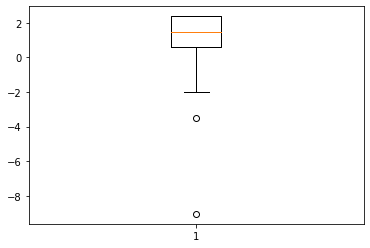

In [412]:
plt.boxplot(dataset_cap['age_first_funding_year'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa62f4f0d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa62f501490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa62f4f0a30>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa62f501b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa62f501e50>],
 'means': []}

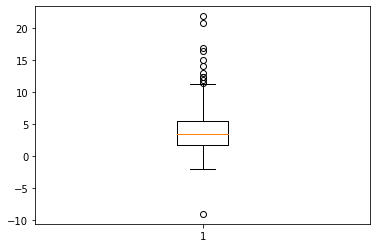

In [413]:
plt.boxplot(dataset['age_last_funding_year'])

In [416]:
q1=dataset_cap['age_last_funding_year'].quantile(0.5)
q3=dataset_cap['age_last_funding_year'].quantile(0.6)
iqr=q3-q1
upper_whisker=q3+(1.5*iqr)
lower_whisker=q1+(1.5*iqr)
dataset_cap['age_last_funding_year']=np.where(dataset_cap['age_last_funding_year']>upper_whisker,upper_whisker,np.where(dataset_cap['age_last_funding_year']<lower_whisker,lower_whisker,dataset['age_last_funding_year']))

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa62f426d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa62f435490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa62f426a30>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa62f435b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa62f435e50>],
 'means': []}

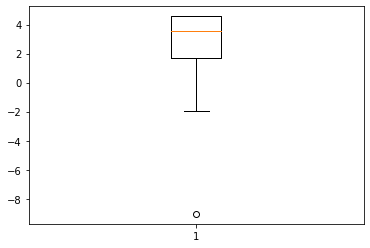

In [417]:
plt.boxplot(dataset_cap['age_last_funding_year'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa62f403c40>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa62f410340>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa62f4038e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa62f410a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa62f410d00>],
 'means': []}

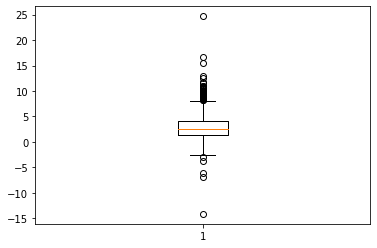

In [418]:
plt.boxplot(dataset['age_first_milestone_year'])

In [421]:
q1=dataset_cap['age_first_milestone_year'].quantile(0.3)
q3=dataset_cap['age_first_milestone_year'].quantile(0.7)
iqr=q3-q1
upper_whisker=q3+(1.5*iqr)
lower_whisker=q1+(1.5*iqr)
dataset_cap['age_first_milestone_year']=np.where(dataset_cap['age_first_milestone_year']>upper_whisker,upper_whisker,np.where(dataset_cap['age_first_milestone_year']<lower_whisker,lower_whisker,dataset['age_first_milestone_year']))

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa62f342af0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa62f3501f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa62f342790>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa62f3508b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa62f350bb0>],
 'means': []}

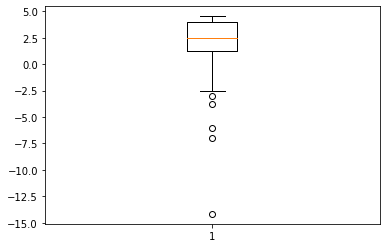

In [422]:
plt.boxplot(dataset_cap['age_first_milestone_year'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa62f2a5340>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa62f2a5a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa62f31bfa0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa62f2b4100>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa62f2b4400>],
 'means': []}

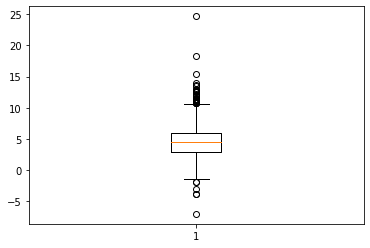

In [423]:
plt.boxplot(dataset['age_last_milestone_year'])

In [446]:
q1=dataset_cap['age_last_milestone_year'].quantile(0.45)
q3=dataset_cap['age_last_milestone_year'].quantile(0.6)
iqr=q3-q1
upper_whisker=q3+(1.5*iqr)
lower_whisker=q1+(1.5*iqr)
dataset_cap['age_last_milestone_year']=np.where(dataset_cap['age_last_milestone_year']>upper_whisker,upper_whisker,np.where(dataset_cap['age_last_milestone_year']<lower_whisker,lower_whisker,dataset['age_last_milestone_year']))

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa62eed2fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa62ee5e6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa62eed2c40>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa62ee5ed60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa62ee6a0a0>],
 'means': []}

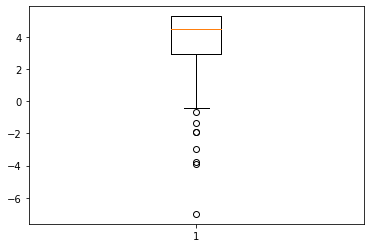

In [447]:
plt.boxplot(dataset_cap['age_last_milestone_year'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa62ee2d970>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa62ee3a070>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa62ee2d610>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa62ee3a730>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa62ee3aa30>],
 'means': []}

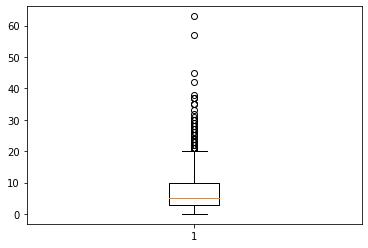

In [448]:
plt.boxplot(dataset['relationships'])

In [479]:
q1=dataset_cap['relationships'].quantile(0.75)
q3=dataset_cap['relationships'].quantile(0.85)
iqr=q3-q1
upper_whisker=q3+(1.5*iqr)
lower_whisker=q1+(1.5*iqr)
dataset_cap['relationships']=np.where(dataset_cap['relationships']>upper_whisker,upper_whisker,np.where(dataset_cap['relationships']<lower_whisker,lower_whisker,dataset['relationships']))

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa62e8a97f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa62e8a9eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa62e8a9490>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa62e8b55b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa62e8b58b0>],
 'means': []}

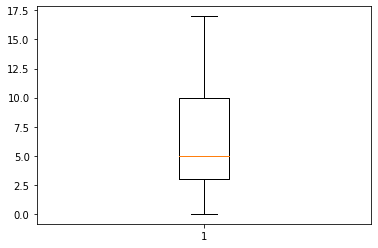

In [480]:
plt.boxplot(dataset_cap['relationships'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa62e882e20>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa62e890520>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa62e882ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa62e890be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa62e890ee0>],
 'means': []}

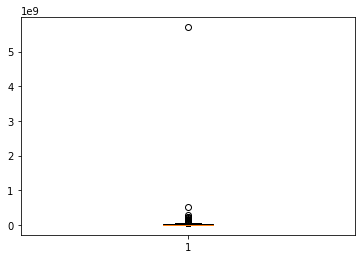

In [481]:
plt.boxplot(dataset['funding_total_usd'])

In [500]:
q1=dataset_cap['funding_total_usd'].quantile(0.65)
q3=dataset_cap['funding_total_usd'].quantile(0.75)
iqr=q3-q1
upper_whisker=q3+(1.5*iqr)
lower_whisker=q1+(1.5*iqr)
dataset_cap['funding_total_usd']=np.where(dataset_cap['funding_total_usd']>upper_whisker,upper_whisker,np.where(dataset_cap['funding_total_usd']<lower_whisker,lower_whisker,dataset['funding_total_usd']))

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa62e51d400>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa62e51dac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa62e51d0a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa62e4a71c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa62e4a74c0>],
 'means': []}

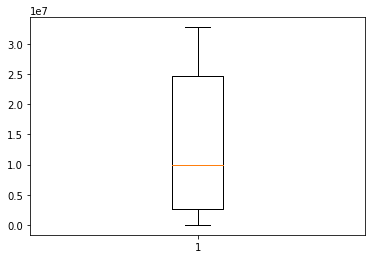

In [501]:
plt.boxplot(dataset_cap['funding_total_usd'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa62e478280>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa62e478940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa62e46aee0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa62e483040>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa62e483340>],
 'means': []}

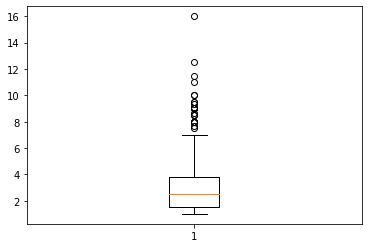

In [502]:
plt.boxplot(dataset['avg_participants'])

In [517]:
q1=dataset_cap['avg_participants'].quantile(0.45)
q3=dataset_cap['avg_participants'].quantile(0.35)
iqr=q3-q1
upper_whisker=q3+(1.5*iqr)
lower_whisker=q1+(1.5*iqr)
dataset_cap['avg_participants']=np.where(dataset_cap['avg_participants']>upper_whisker,upper_whisker,np.where(dataset_cap['avg_participants']<lower_whisker,lower_whisker,dataset['avg_participants']))

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa62e1cd3a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa62e1cda60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa62e1cd040>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa62e1d8160>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa62e1d8460>],
 'means': []}

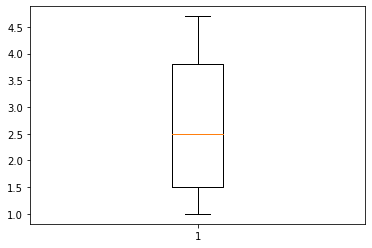

In [518]:
plt.boxplot(dataset_cap['avg_participants'])

** we see that dataset_cap is now the outliers free data **

In [ ]:
# divide the data into X and Y

In [519]:
dataset_cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state_code                923 non-null    int64  
 1   labels                    923 non-null    int64  
 2   age_first_funding_year    923 non-null    float64
 3   age_last_funding_year     923 non-null    float64
 4   age_first_milestone_year  923 non-null    float64
 5   age_last_milestone_year   923 non-null    float64
 6   relationships             923 non-null    float64
 7   funding_rounds            923 non-null    int64  
 8   funding_total_usd         923 non-null    float64
 9   milestones                923 non-null    int64  
 10  state_code.1              922 non-null    object 
 11  is_CA                     923 non-null    int64  
 12  is_NY                     923 non-null    int64  
 13  is_MA                     923 non-null    int64  
 14  is_TX     

In [520]:
dataset_cap=dataset_cap.drop(['state_code.1'],axis=1)

In [521]:
X=dataset_cap.drop(['status'],axis=1)

In [522]:
X

,state_code,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,2,1,2.24930,3.00270,4.5375,5.2699,3.0,3,375000.0,3,...,0,1,0,1,0,0,0,0,1.0000,0
1,2,1,2.37945,4.57427,4.5375,5.2699,9.0,4,32742500.0,1,...,0,0,1,0,0,1,1,1,4.7000,1
2,2,1,1.03290,1.03290,1.4575,2.2055,5.0,1,2600000.0,2,...,0,0,0,0,1,0,0,0,4.0000,1
3,2,1,2.37945,4.57427,4.5375,5.2699,5.0,3,32742500.0,1,...,0,0,0,0,0,1,1,1,3.3333,1
4,2,0,0.00000,1.66850,0.0384,0.0384,2.0,2,1300000.0,1,...,0,0,1,1,0,0,0,0,1.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,2,1,0.51780,0.51780,0.5808,4.5260,9.0,1,1100000.0,2,...,0,0,0,0,1,0,0,0,4.7000,1
919,12,0,2.37945,4.57427,4.5375,5.2699,1.0,3,32742500.0,1,...,0,1,1,0,0,1,0,0,2.6667,1
920,2,0,2.37945,4.57427,4.5375,5.2699,5.0,1,32742500.0,1,...,0,0,0,0,0,0,0,1,4.7000,1
921,2,1,0.75890,2.83290,0.7589,3.8356,12.0,2,15500000.0,2,...,0,0,0,0,1,1,0,0,1.0000,1


In [523]:
Y=dataset_cap['status']

In [524]:
Y

0      0
1      0
2      0
3      0
4      1
      ..
918    0
919    1
920    1
921    0
922    0
Name: status, Length: 923, dtype: int64

In [525]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2022)

In [526]:
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier(n_estimators = 100,max_depth=2,random_state=22)
rand_forest.fit(X_train,Y_train)
Y_pred = rand_forest.predict(X_test)

In [527]:
from sklearn.metrics import accuracy_score
accuracyRandfor = (accuracy_score(Y_test,Y_pred))

In [528]:
accuracyRandfor

0.9297297297297298

In [529]:
from sklearn.metrics import f1_score
f1_score(Y_test, Y_pred)

0.8571428571428571

**creating pickle**

In [ ]:
import pickle

In [ ]:
filename='start-up_prediction_decision-tree'                     # name of file under which model will be saved
pickle.dump(rand_forest,open(filename,'wb'))

In [ ]:
# we can open the model we saved 
model=pickle.load(open('/content/start-up_prediction_decision-tree','rb'))

In [ ]:
model.predict(X_test)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0])